# Decison Trees - Students Pass or Fail

A Decision Tree is a versatile machine learning algorithm that can be used for both classification and regression tasks. It works by splitting the dataset into smaller subsets based on feature values. Each split represents a decision that brings the model closer to predicting the final output.

We will be looking into how to classify whether a student Pass or Fail the exam based on the features Number of Hours studied and the Previous Exam Score.   Pass = 1 and Fail = 1

In [1]:
#import the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

#### Here we will look at why these specific libraries are used
_numpy_ and _pandas_: These libraries are used to create and manipulate numerical data and datasets.  
_train_test_split_: This function from scikit-learn splits your dataset into training and testing sets.  
_DecisionTreeClassifier_: This is the core algorithm from scikit-learn that we use to create the Decision Tree for classification.  
_accuracy_score_ and _confusion_matrix_: Used to evaluate the model's performance by calculating accuracy and displaying the confusion matrix.  
_matplotlib_ and _seaborn_: Libraries used for plotting the Decision Tree and visualizing the confusion matrix.  

In [5]:
#load the dataset
df = pd.read_csv('data/student_exam_data.csv', names=['Hours_Studied', 'Previous_Exam_Score', 'Pass_Fail'])

# Display the first few rows of the dataset to check it's loaded properly
print(df.head())
# Check the data types of each column
print(df.dtypes)   


   Hours_Studied  Previous_Exam_Score  Pass_Fail
0       4.370861            81.889703          0
1       9.556429            72.165782          1
2       7.587945            58.571657          0
3       6.387926            88.827701          1
4       2.404168            81.083870          0
Hours_Studied          float64
Previous_Exam_Score    float64
Pass_Fail                int64
dtype: object


In [6]:
# Defining Features and Labels
X = df[['Hours_Studied', 'Previous_Exam_Score']]  # Features
y = df['Pass_Fail']  # Label (Pass/Fail)

In [7]:
# Convert categorical labels (Pass/Fail) to numerical values
label_encoder = LabelEncoder()
df['Pass'] = label_encoder.fit_transform(df['Pass_Fail'])

In [8]:
#  Splitting the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**note**  
if you're wondering why random_state is set to 42, its a common practice to use 42 & the number is popular choice in the programming community _(inspired by the book The Hitchhiker's Guide to the Galaxy where 42 is "the answer to the ultimate question of life, the universe, and everything")_
you can use any integer by practice.

In [9]:
# Training the Decision Tree Model 
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
# Making Predictions
y_pred = dt_model.predict(X_test)

In [11]:
# Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.99
Confusion Matrix:
 [[64  0]
 [ 1 35]]


**note**  
this model accuracy is 99%, which is good  
_accuracy_score(y_test, y_pred)_: Calculates how many predictions were correct by comparing the true labels (y_test) with the predicted labels (y_pred).  
_confusion_matrix(y_test, y_pred)_: Builds a confusion matrix to show how well the model predicted each class (pass/fail).

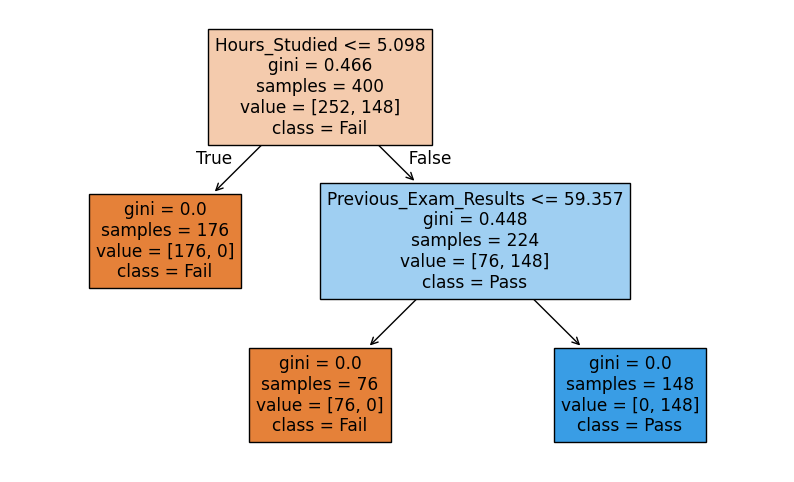

In [13]:
# Visualizing the Decision Tree
plt.figure(figsize=(10, 6))
tree.plot_tree(dt_model, feature_names=['Hours_Studied', 'Previous_Exam_Results'], class_names=['Fail', 'Pass'], filled=True)
plt.show()

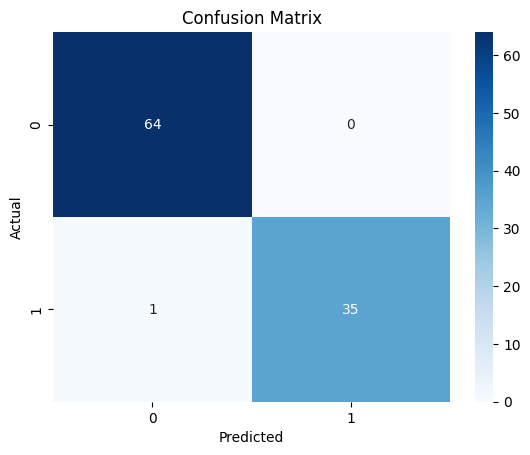

In [14]:
# Visualizing the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

_The confusion matrix helps evaluate how well the model is performing in terms of correct and incorrect predictions._

Here we use Seaborn’s **heatmap** to create a visual representation of the confusion matrix.  
_annot=True_: Annotates the matrix with actual numbers.  
_fmt='d'_: Ensures the annotations are integers.  
_cmap='Blues'_: Uses a blue color map to make the plot visually appealing.  